# EDA – Phishing and MFA Dataset

This notebook analyzes a phishing-focused synthetic dataset designed for understanding fraud occurrence, MFA weaknesses, and user behavior during different stages of a transaction. The dataset is based on realistic distributions from public threat intelligence reports and supports the TBP root cause analysis and countermeasure development.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("./data/synthetic_phishing_mfa_dataset.csv")
df.head()

,phishing_type,mfa_type,user_error,fraud_occurred,transaction_stage,transaction_successful,user_awareness_score,industry
0,SMS,Authenticator App,Clicked malicious link,True,Initiation,False,3,Healthcare
1,Social Media,SMS,Shared OTP/code,True,Initiation,False,1,Government
2,SMS,SMS,Reused password,True,Completion,True,5,Banking
3,SMS,Authenticator App,Reused password,True,Initiation,False,3,Retail
4,Email,Authenticator App,Reused password,True,Initiation,True,2,Banking


## Missing Values

In [2]:
df.isnull().sum()

phishing_type             0
mfa_type                  0
user_error                0
fraud_occurred            0
transaction_stage         0
transaction_successful    0
user_awareness_score      0
industry                  0
dtype: int64

## Phishing Type Distribution

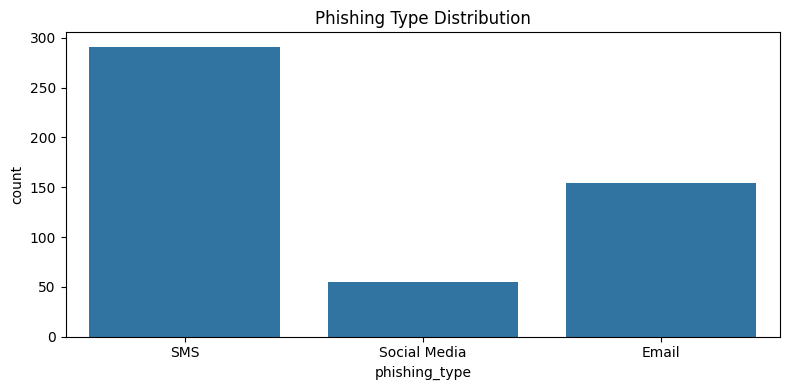

In [3]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='phishing_type')
plt.title('Phishing Type Distribution')
plt.tight_layout()
plt.show()

## Fraud Occurrence by MFA Type

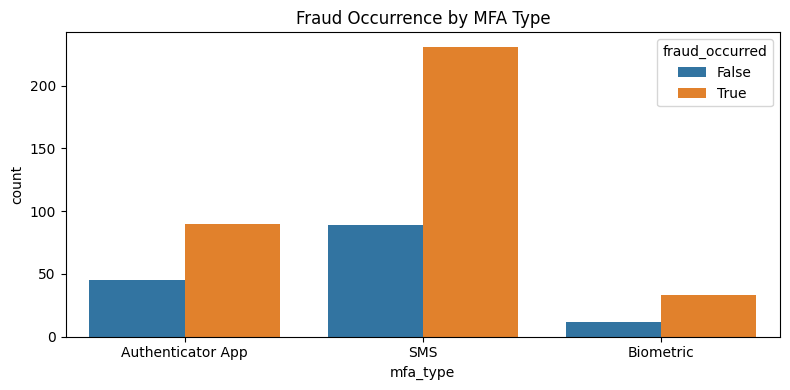

In [4]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='mfa_type', hue='fraud_occurred')
plt.title('Fraud Occurrence by MFA Type')
plt.tight_layout()
plt.show()

## Fraud Occurrence by User Error Type

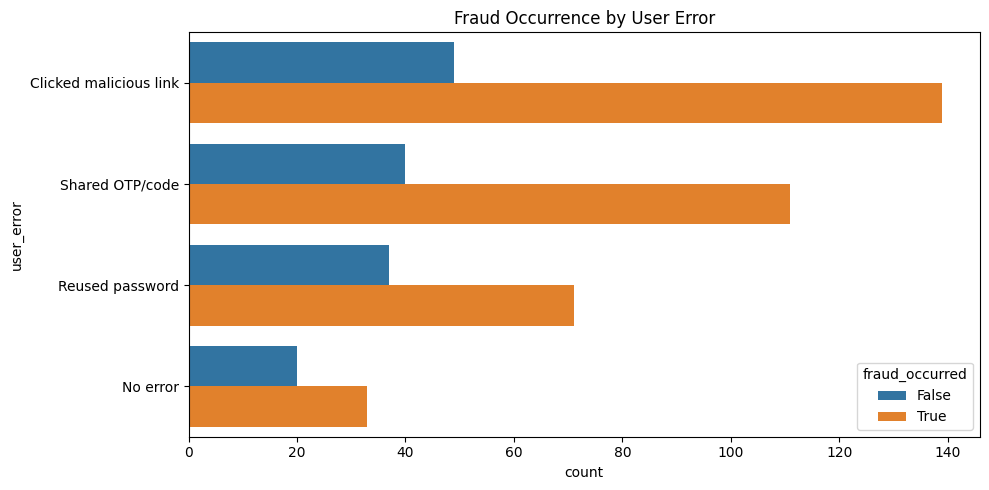

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='user_error', hue='fraud_occurred')
plt.title('Fraud Occurrence by User Error')
plt.tight_layout()
plt.show()

## Fraud Occurrence by Transaction Stage

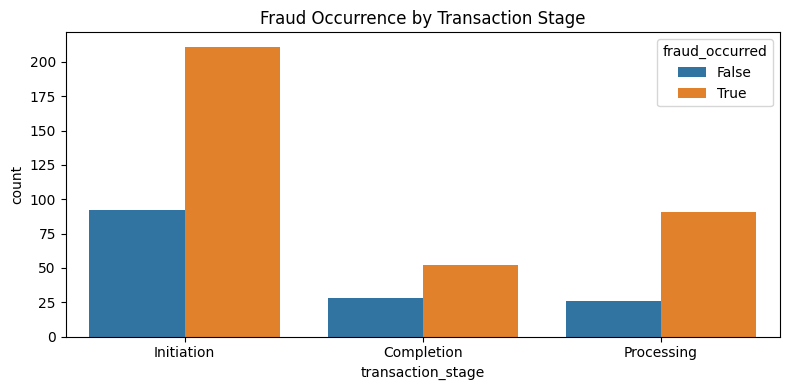

In [6]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='transaction_stage', hue='fraud_occurred')
plt.title('Fraud Occurrence by Transaction Stage')
plt.tight_layout()
plt.show()

##  Phishing-Based EDA Summary

### 1. Phishing Type Distribution
The dataset shows that **SMS-based phishing** is the most prevalent method, accounting for nearly **290 out of 500 cases**, followed by **Email (~150 cases)** and **Social Media phishing (~60 cases)**.  
This validates our TBP decision to emphasize **SMS phishing** due to its high occurrence rate in real-world attacks.


### 2. Fraud Occurrence by MFA Type
- **SMS MFA** had the **highest number of fraud occurrences**, highlighting known vulnerabilities like SIM swapping and OTP interception.  
- **Authenticator apps** demonstrated **better resistance**, while **Biometric MFA** had the lowest fraud count, albeit with fewer observations.

This supports our countermeasure strategy to integrate **AI-driven detection beyond MFA**, as **fraud still occurs despite MFA being active**.

### 3. User Error and Fraud Link
Key user mistakes associated with fraud were:
- **Clicked malicious links** (~140 fraud cases) – most common trigger.
- **Shared OTP/code** (~110 fraud cases) – a major vulnerability.
- **Reused passwords** – contributed significantly to fraud exposure.

These behavioral factors align with phishing-based deception and emphasize the need for **dynamic risk scoring** and **continuous user education**.

### 4. Transaction Stage Where Fraud Occurred
The **Initiation stage** is where the highest fraud volume occurred (**>210 cases**), confirming it as the **Point of Occurrence** in our TBP Step 2.  
This directly supports our Step 3 target to deploy **AI-based fraud detection at transaction initiation** for real-time interception.
